# Data Collection

In [62]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

ds = pd.read_csv('spam vs ham_sms.csv')
ds.head(10)

,User ID,LOCATION,CLASS,SMS
0,@user123,New York,ham,"said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!"
1,user456,Los Angeles,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,moviefan789,London,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..
3,forumuser1,Toronto,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 87131 to get your FREE POLY TONE of the week now! 16 SN PoBox202 NR31 7ZS subscription 450pw
4,foodie22,Paris,spam,**FREE MESSAGE**Thanks for using the Auction Subscription Service. 18 . 150p/MSGRCVD 2 Skip an Auction txt OUT. 2 Unsubscribe txt STOP CustomerCare 08718726270
5,shopper123,San Francisco,spam,+123 Congratulations - in this week's competition draw u have won the Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
6,musiclover456,Berlin,spam,+123 Congratulations - in this week's competition draw u have won the Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
7,testimonialuser1,Sydney,spam,+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON Â£1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. maxÂ£7. 50
8,user123,New York,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches
9,user456,Los Angeles,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min


# Data Inspection

In [63]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User ID   1500 non-null   object
 1   LOCATION  1500 non-null   object
 2   CLASS     1500 non-null   object
 3   SMS       1500 non-null   object
dtypes: object(4)
memory usage: 47.0+ KB


In [64]:
ds.isnull().sum()

User ID     0
LOCATION    0
CLASS       0
SMS         0
dtype: int64

In [65]:
ds.shape

(1500, 4)

# Data Cleaning

In [66]:
ds.drop(['User ID', 'LOCATION'], axis='columns', inplace=True)
ds.head(10)

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!"
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 87131 to get your FREE POLY TONE of the week now! 16 SN PoBox202 NR31 7ZS subscription 450pw
4,spam,**FREE MESSAGE**Thanks for using the Auction Subscription Service. 18 . 150p/MSGRCVD 2 Skip an Auction txt OUT. 2 Unsubscribe txt STOP CustomerCare 08718726270
5,spam,+123 Congratulations - in this week's competition draw u have won the Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
6,spam,+123 Congratulations - in this week's competition draw u have won the Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
7,spam,+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON Â£1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. maxÂ£7. 50
8,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches
9,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min


In [67]:
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load stopwords list from NLTK library
stopwords_list = stopwords.words("english")

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    # Remove certain stop words
    text = ' '.join([word for word in text.lower().split() if word not in stopwords_list])
    # Remove punctuations
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Remove numbers
    text = re.sub(r'[0-9]', ' ', text)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)
    return text

# Preprocess the SMS messages
ds["CLEAN_SMS"] = ds["SMS"].apply(preprocess_text)
ds.head()

,CLASS,SMS,CLEAN_SMS
0,ham,"said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!",said kiss kiss sound effects gorgeous man kind person needs smile brighten day
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,lt gt ish minutes minutes ago wtf
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..,bank granite issues strong buy explosive pick members nasdaq symbol cdgt per
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 87131 to get your FREE POLY TONE of the week now! 16 SN PoBox202 NR31 7ZS subscription 450pw,free polyphonic ringtone text super get free poly tone week sn pobox nr zs subscription pw
4,spam,**FREE MESSAGE**Thanks for using the Auction Subscription Service. 18 . 150p/MSGRCVD 2 Skip an Auction txt OUT. 2 Unsubscribe txt STOP CustomerCare 08718726270,free message thanks using auction subscription service p msgrcvd skip auction txt unsubscribe txt stop customercare


In [68]:
ds.drop(['SMS'], axis='columns', inplace=True)
ds.head(10)

,CLASS,CLEAN_SMS
0,ham,said kiss kiss sound effects gorgeous man kind person needs smile brighten day
1,ham,lt gt ish minutes minutes ago wtf
2,spam,bank granite issues strong buy explosive pick members nasdaq symbol cdgt per
3,spam,free polyphonic ringtone text super get free poly tone week sn pobox nr zs subscription pw
4,spam,free message thanks using auction subscription service p msgrcvd skip auction txt unsubscribe txt stop customercare
5,spam,congratulations week competition draw u prize claim call b cs stop sms ppm
6,spam,congratulations week competition draw u prize claim call b cs stop sms ppm
7,spam,urgent nd attempt contact u u call b csbcm wc n xx callcost ppm mobilesvary max
8,spam,forwarded hi mailbox messaging sms alert messages matches please call back retrieve messages matches
9,spam,forwarded hi mailbox messaging sms alert matches please call back retrieve messages matches cc p min


In [69]:
pd.set_option('display.max_colwidth', None)
ds.head(10)

,CLASS,CLEAN_SMS
0,ham,said kiss kiss sound effects gorgeous man kind person needs smile brighten day
1,ham,lt gt ish minutes minutes ago wtf
2,spam,bank granite issues strong buy explosive pick members nasdaq symbol cdgt per
3,spam,free polyphonic ringtone text super get free poly tone week sn pobox nr zs subscription pw
4,spam,free message thanks using auction subscription service p msgrcvd skip auction txt unsubscribe txt stop customercare
5,spam,congratulations week competition draw u prize claim call b cs stop sms ppm
6,spam,congratulations week competition draw u prize claim call b cs stop sms ppm
7,spam,urgent nd attempt contact u u call b csbcm wc n xx callcost ppm mobilesvary max
8,spam,forwarded hi mailbox messaging sms alert messages matches please call back retrieve messages matches
9,spam,forwarded hi mailbox messaging sms alert matches please call back retrieve messages matches cc p min


# Wordcloud

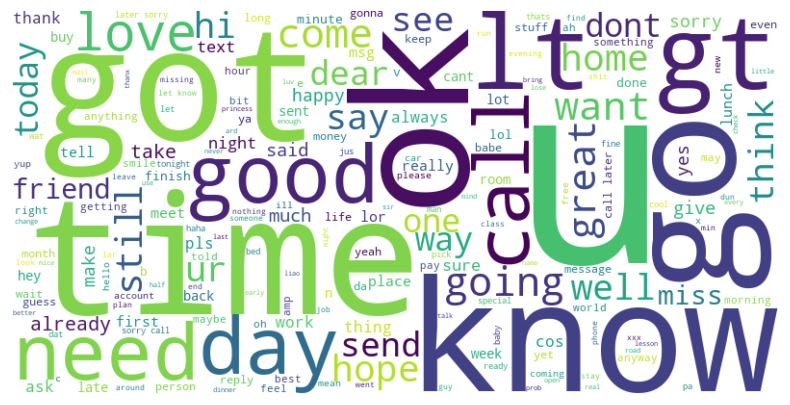

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataset to select rows with 'CLASS' column value equal to 'ham'
ham_sms = ds[ds['CLASS'] == 'ham']

# Combine all the 'CLEAN_SMS' text into a single string
ham_sms_text = " ".join(ham_sms['CLEAN_SMS'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_sms_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

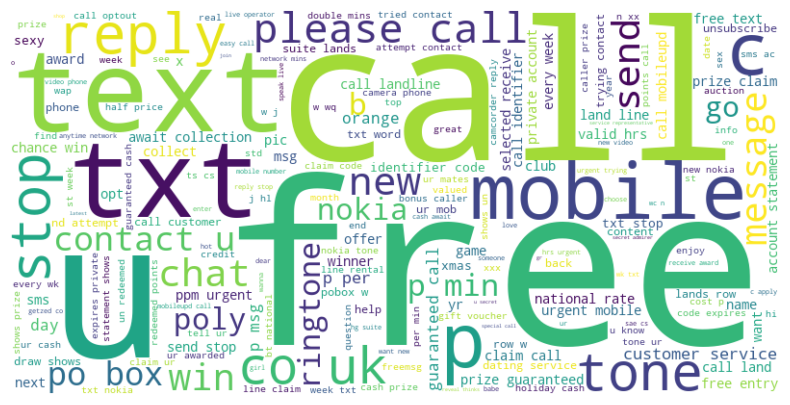

In [71]:
# Filter the dataset to select rows with 'CLASS' column value equal to 'spam'
spam_sms = ds[ds['CLASS'] == 'spam']

# Combine all the 'CLEAN_SMS' text into a single string
spam_sms_text = " ".join(spam_sms['CLEAN_SMS'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_sms_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(ds['CLEAN_SMS'])

# Data Preprocessing using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(ds['CLEAN_SMS'])

encoder = LabelEncoder()
y = encoder.fit_transform(ds['CLASS'])

In [73]:
X_count

<1500x3458 sparse matrix of type '<class 'numpy.int64'>'
	with 14154 stored elements in Compressed Sparse Row format>

In [74]:
X_tfidf

<1500x3458 sparse matrix of type '<class 'numpy.float64'>'
	with 14154 stored elements in Compressed Sparse Row format>

In [75]:
y

array([0, 0, 1, ..., 0, 0, 1])

# ANN Model 

In [76]:
# ANN model for CountVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Build the model
count_model = Sequential()

# Input layer
count_model.add(Dense(64, input_shape=(X_train_count.shape[1],), activation='relu'))

# Hidden layers
count_model.add(Dropout(0.5))

# Output layer
count_model.add(Dense(1, activation='sigmoid'))

count_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
count_model.fit(X_train_count.toarray(), y_train_count, epochs=10, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
30/30 [==============================] - 1s 6ms/step - loss: 0.6318 - accuracy: 0.6469 - val_loss: 0.5857 - val_accuracy: 0.7833
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.9052 - val_loss: 0.4576 - val_accuracy: 0.9000
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.9698 - val_loss: 0.3568 - val_accuracy: 0.9125
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9844 - val_loss: 0.2865 - val_accuracy: 0.9292
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1603 - accuracy: 0.9917 - val_loss: 0.2435 - val_accuracy: 0.9333
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9906 - val_loss: 0.2184 - val_accuracy: 0.9375
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9927 - val_loss: 0.2028 - val_accuracy: 0.9375
Epoch 8/10
30/30 [==

In [77]:
# ANN model for TfidfVectorizer

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

tfidf_model = Sequential()
tfidf_model.add(Dense(64, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
tfidf_model.add(Dropout(0.5))
tfidf_model.add(Dense(1, activation='sigmoid'))

tfidf_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf.toarray(), y_train_tfidf, epochs=10, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
30/30 [==============================] - 1s 6ms/step - loss: 0.6783 - accuracy: 0.7260 - val_loss: 0.6616 - val_accuracy: 0.8417
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.9260 - val_loss: 0.5920 - val_accuracy: 0.9167
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.9698 - val_loss: 0.4976 - val_accuracy: 0.9375
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.9781 - val_loss: 0.4089 - val_accuracy: 0.9375
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.9812 - val_loss: 0.3417 - val_accuracy: 0.9458
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9854 - val_loss: 0.2958 - val_accuracy: 0.9333
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9906 - val_loss: 0.2654 - val_accuracy: 0.9375
Epoch 8/10
30/30 [==

# Evaluate ANN Model Performance

In [78]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_count = count_model.predict(X_test_count.toarray())
y_pred_count = np.round(y_pred_count).flatten()

y_pred_tfidf = tfidf_model.predict(X_test_tfidf.toarray())
y_pred_tfidf = np.round(y_pred_tfidf).flatten()

accuracy_count = accuracy_score(y_test_count, y_pred_count)
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)

print("Accuracy using CountVectorizer:", accuracy_count)
print("Accuracy using TfidfVectorizer:", accuracy_tfidf)

10/10 [==============================] - 0s 887us/step
Accuracy using CountVectorizer: 0.96
Accuracy using TfidfVectorizer: 0.96


# Testing CountVectorizer ANN Model

In [82]:
#"Congratulations! You have won a prize. Click the link to claim."
#"Yup I will come over"

input_text = input("Enter a text:") 

input_count = count_vectorizer.transform([input_text])

prediction_count = count_model.predict(input_count.toarray())

if prediction_count[0][0] > 0.5:
    print("The given input using CountVectorizer is classified as SPAM.")
else:
    print("The given input using CountVectorizer is classified as HAM.")

Enter a text:Congratulations! You have won a prize. Click the link to claim.
1/1 [==============================] - 0s 14ms/step
The given input using CountVectorizer is classified as SPAM.


# Testing TfidfVectorizer ANN Model

In [84]:
#"Congratulations! You have won a prize. Click the link to claim."
#"Yup I will come over"

input_text1 = input("Enter a text:")

input_tfidf1 = tfidf_vectorizer.transform([input_text1])

prediction_tfidf1 = tfidf_model.predict(input_tfidf1.toarray())

if prediction_tfidf1[0][0] > 0.5:
    print("The given input using TfidfVectorizer is classified as SPAM.")
else:
    print("The given input using TfidfVectorizer is classified as HAM.")

Enter a text:Yup I will come over
1/1 [==============================] - 0s 15ms/step
The given input using TfidfVectorizer is classified as HAM.
